<a href="https://colab.research.google.com/github/bennykan/ML1020/blob/master/Ml1020_Pretrained_Model_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.version
import keras

Using TensorFlow backend.


In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/benny/Documents/Machine Learning/ML1020/Final Project/Data/imgs/Sample'

train_dir = os.path.join(base_dir, 'train')
print(train_dir)
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

train_features = np.zeros(shape=(200, 15, 20, 512))
train_labels = np.zeros(shape=(200,10))
 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(480, 640),
    batch_size=batch_size,
    class_mode='categorical')

C:/Users/benny/Documents/Machine Learning/ML1020/Final Project/Data/imgs/Sample\train
Found 200 images belonging to 10 classes.


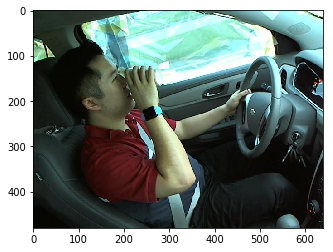

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(base_dir + '/train/c6/img_380.jpg')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [9]:
#Loading in Pretrained Model

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(480, 640, 3))

In [10]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 480, 640, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 480, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 480, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 240, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 240, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 240, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 120, 160, 128)     0         
__________

In [11]:
#Feature engineering

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = conv_base.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= 200:
        break
print(train_features.shape)         
train_features = np.reshape(train_features, (200, 15 * 20 * 512))

(200, 15, 20, 512)


In [12]:
print(train_labels)
print(train_features)
print(train_labels.shape)
print(train_features.shape)




[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.40254346 0.         0.         ... 0.         1.53962326 0.        ]
 [0.08720758 0.         0.         ... 0.         0.83492482 0.        ]
 [0.11146257 0.         0.         ... 0.         1.34964502 0.        ]
 ...
 [0.46240032 0.         0.         ... 0.0774622  0.89505064 0.        ]
 [0.         0.         0.         ... 0.         1.04523253 0.        ]
 [0.28970033 0.         0.         ... 0.55438828 0.9524765  0.        ]]
(200, 10)
(200, 153600)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2)

In [14]:
print(X_train)
print(X_train.shape)
print(X_test.shape)

[[0.         0.         0.         ... 0.         1.47116733 0.        ]
 [0.95498967 0.         0.50503922 ... 0.         1.36621881 0.        ]
 [0.01399066 0.         0.         ... 0.         0.9302243  0.        ]
 ...
 [0.15756254 0.         0.         ... 0.         1.06143785 0.        ]
 [0.         0.         0.         ... 0.         1.46929359 0.        ]
 [0.53260815 0.         0.         ... 0.         1.45678258 0.        ]]
(160, 153600)
(40, 153600)


In [15]:
# Create NN to classifer 10 outputs
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()


model.add(layers.Dense(256, activation='relu', input_dim=15 * 20 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=7,
                    batch_size=20,
                   validation_data=(X_test,y_test))




model.summary()

Train on 200 samples, validate on 40 samples
Epoch 1/7
200/200 [==============================] - 7s 33ms/step - loss: 2.8585 - acc: 0.1000 - val_loss: 1.9749 - val_acc: 0.3000
Epoch 2/7
200/200 [==============================] - 5s 26ms/step - loss: 2.1429 - acc: 0.2250 - val_loss: 1.7476 - val_acc: 0.4750
Epoch 3/7
200/200 [==============================] - 6s 31ms/step - loss: 1.8290 - acc: 0.3200 - val_loss: 1.3586 - val_acc: 0.6500
Epoch 4/7
200/200 [==============================] - 6s 28ms/step - loss: 1.6542 - acc: 0.4350 - val_loss: 1.1763 - val_acc: 0.8250
Epoch 5/7
200/200 [==============================] - 6s 32ms/step - loss: 1.4331 - acc: 0.5300 - val_loss: 0.9453 - val_acc: 0.8250
Epoch 6/7
200/200 [==============================] - 6s 32ms/step - loss: 1.2401 - acc: 0.6150 - val_loss: 0.7928 - val_acc: 0.8750
Epoch 7/7
200/200 [==============================] - 6s 32ms/step - loss: 0.9560 - acc: 0.7650 - val_loss: 0.6616 - val_acc: 0.9750
_______________________________

Below is the list of testing labels and their descriptions



*   c0: safe driving
*   c1: texting - right
*   c2: talking on the phone - right
*   c3: texting - left
*   c4: talking on the phone - left
*   c5: operating the radio
*   c6: drinking
*   c7: reaching behind
*   c8: hair and makeup
*   c9: talking to passenger


In [17]:
import pandas as pd
import glob

output_dir = 'C:/Users/benny/Documents/Machine Learning/ML1020/Final Project/'
test_base_dir = 'C:/Users/benny/Documents/Machine Learning/ML1020/Final Project/Data/imgs/'
prediction_list = []

for file in glob.glob(test_base_dir + 'test_sample/*jpg'):
  dirname, filename = os.path.split(file)
  pred_row = [filename]
  img = cv2.imread(file)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  testimage = conv_base.predict(img_cvt.reshape(1,480,640,3))
  testimage_rs = np.reshape(testimage, (1, 15 * 20 * 512))
  pred = model.predict_proba(testimage_rs)
  pred_list = pred[0].tolist()
  pred_row = pred_row + pred_list
  prediction_list.append(pred_row)

df_results = pd.DataFrame(prediction_list,columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])
df_results.to_csv(output_dir + 'sample_submission.csv',index=False)
print(df_results)





              img            c0            c1            c2            c3  \
0     img_101.jpg  4.514215e-13  1.134280e-13  2.624270e-16  7.409443e-01   
1      img_11.jpg  9.879310e-06  2.232789e-04  8.772083e-07  5.899321e-03   
2     img_165.jpg  3.283215e-16  9.248904e-10  1.011917e-18  3.558594e-05   
3     img_227.jpg  2.314725e-20  4.239057e-14  4.523541e-15  6.204512e-10   
4   img_25136.jpg  5.142315e-25  1.105159e-18  1.269829e-19  4.135546e-17   
5      img_31.jpg  2.646499e-14  5.007987e-10  1.404507e-06  3.899223e-05   
6     img_326.jpg  2.973103e-18  2.195335e-16  2.286654e-11  6.497845e-06   
7      img_39.jpg  5.143833e-22  3.546906e-14  1.312054e-17  3.476712e-13   
8   img_41068.jpg  4.691049e-03  2.218396e-08  5.663086e-10  2.037043e-05   
9   img_49714.jpg  1.836133e-12  7.464965e-09  3.222026e-06  6.702927e-03   
10  img_58795.jpg  3.166850e-11  7.619168e-11  1.010768e-12  8.490231e-01   
11  img_71146.jpg  1.190615e-11  1.476226e-14  8.231493e-16  5.555592e-02   